<a href="https://colab.research.google.com/github/lautitorraca/7506R-2C2023-GRUPO24/blob/main/TP1/limpieza_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [264]:
!pip install 'dtreeviz'

In [265]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    recall_score,
    f1_score,
    precision_score,
)

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz.trees as dtreeviz

# Modelos y métricas
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import roc_auc_score
from sklearn.neural_network import MLPClassifier
from google.colab import files

# Configuración de advertencias
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [266]:
url_train = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_train.csv'
url_test = 'https://raw.githubusercontent.com/lautitorraca/7506R-2C2023-GRUPO24/main/TP1/DataSets/hotels_test.csv'

ds_train_base = pd.read_csv(url_train)
ds_test_base = pd.read_csv(url_test)

ds_test = ds_test_base.copy()
df_test = pd.DataFrame(ds_test_base)

ds_train = ds_train_base.copy()
df_train = pd.DataFrame(ds_train_base)

In [267]:

features = ['lead_time_category','booking_changes','required_car_parking_spaces','total_of_special_requests','room_type_match','cancel_to_noncancel_ratio', 'is_repeated_guest',
             'previous_cancellations','country', 'market_segment', 'deposit_type', 'distribution_channel', 'stays_in_weekend_nights', 'adults','babies', 'days_in_waiting_list_category',
             'customer_type','hotel','is_canceled','id']

columns_to_dum= ['lead_time_category','hotel', 'country', 'market_segment', 'deposit_type', 'distribution_channel', 'days_in_waiting_list_category', 'customer_type']

### Test


In [268]:

df_test['room_type_match'] = df_test['assigned_room_type'] == df_test['reserved_room_type']
df_test['cancel_to_noncancel_ratio'] = df_test['previous_cancellations'] / (1 + df_test['previous_bookings_not_canceled'])
df_test['lead_time_category'] = pd.cut(df_test['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_test['days_in_waiting_list_category'] = pd.cut(df_test['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

country_counts_test = df_test['country'].value_counts()
top_10_countries_test = country_counts_test.head(10).index.tolist()
df_test['country'] = df_test['country'].apply(lambda x: x if x in top_10_countries_test else 'otro')

market_segment_counts_test = df_test['market_segment'].value_counts()
top_3_ms_test = market_segment_counts_test.head(4).index.tolist()
df_test['market_segment'] = df_test['market_segment'].apply(lambda x: x if x in top_3_ms_test else 'otro')

ct_counts_test = df_test['customer_type'].value_counts()
top_ct_test = ct_counts_test.head(2).index.tolist()
df_test['customer_type'] = df_test['customer_type'].apply(lambda x: x if x in top_ct_test else 'otro')


dc_counts_test = df_test['distribution_channel'].value_counts()
top_dc_test = dc_counts_test.head(2).index.tolist()
df_test['distribution_channel'] = df_test['distribution_channel'].apply(lambda x: x if x in top_dc_test else 'otro')


In [269]:
round(df_test.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,26535.0,112.07,110.15,0.0,23.0,79.0,171.0,737.0
arrival_date_year,26535.0,2016.16,0.71,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,26535.0,27.18,13.47,1.0,17.0,27.0,38.0,53.0
arrival_date_day_of_month,26535.0,15.78,8.77,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,26535.0,0.93,1.01,0.0,0.0,1.0,2.0,14.0
stays_in_week_nights,26535.0,2.52,1.90,0.0,1.0,2.0,3.0,35.0
adults,26535.0,1.87,0.63,0.0,2.0,2.0,2.0,50.0
children,26535.0,0.10,0.39,0.0,0.0,0.0,0.0,3.0
babies,26535.0,0.01,0.10,0.0,0.0,0.0,0.0,10.0
is_repeated_guest,26535.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


In [270]:

#Adults
media_adults=np.mean(df_test.adults)
std_adults=np.std(df_test.adults)
df_test['z_adults']=(df_test.adults - media_adults)/std_adults


#Babies
media_babies=np.mean(df_test.babies)
std_babies=np.std(df_test.babies)
df_test['z_babies']=(df_test.babies - media_babies)/std_babies


# Children
media_children = np.mean(df_test.children)
std_children = np.std(df_test.children)
df_test['z_children'] = (df_test.children - media_children) / std_children


#Adr
media_adr=np.mean(df_test.adr)
std_adr=np.std(df_test.adr)
df_test['z_adr']=(df_test.adr - media_adr)/std_adr

In [271]:
# df_test[(df_test['z_adults'] > 3)]

In [272]:
# df_test[(df_test['z_adults'] < - 3)]

In [273]:
# df_test[(df_test['z_babies'] > 3)]

In [274]:
# df_test[(df_test['z_babies'] < -3)]

In [275]:
# df_test[(df_test['z_adr'] > 3)]

In [276]:
# df_test[(df_test['z_adr'] < -3)]

In [277]:
df_test.loc[(df_test['z_adults'] > 3), 'adults'] = media_adults
df_test.loc[(df_test['z_adults'] < -3), 'adults'] = media_adults

df_test.loc[(df_test['z_babies'] > 3), 'babies'] = media_babies
df_test.loc[(df_test['z_babies'] < -3), 'babies'] = media_babies

df_test.loc[(df_test['z_children'] > 3), 'children'] = media_children
df_test.loc[(df_test['z_children'] < -3), 'children'] = media_children

df_test.loc[(df_test['z_adr'] > 5), 'adr'] = media_adr
df_test.loc[(df_test['z_adr'] < -5), 'adr'] = media_adr

In [278]:

df_test.drop(columns =['z_adults', 'z_babies', 'z_children', 'z_adr'], axis=1, inplace = True)


In [279]:
round(df_test.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,26535.0,112.07,110.15,0.0,23.0,79.0,171.0,737.00
arrival_date_year,26535.0,2016.16,0.71,2015.0,2016.0,2016.0,2017.0,2017.00
arrival_date_week_number,26535.0,27.18,13.47,1.0,17.0,27.0,38.0,53.00
arrival_date_day_of_month,26535.0,15.78,8.77,1.0,8.0,16.0,23.0,31.00
stays_in_weekend_nights,26535.0,0.93,1.01,0.0,0.0,1.0,2.0,14.00
stays_in_week_nights,26535.0,2.52,1.90,0.0,1.0,2.0,3.0,35.00
adults,26535.0,1.86,0.48,0.0,2.0,2.0,2.0,3.00
children,26535.0,0.04,0.19,0.0,0.0,0.0,0.0,1.00
babies,26535.0,0.00,0.00,0.0,0.0,0.0,0.0,0.01
is_repeated_guest,26535.0,0.03,0.16,0.0,0.0,0.0,0.0,1.00


# Multivariado

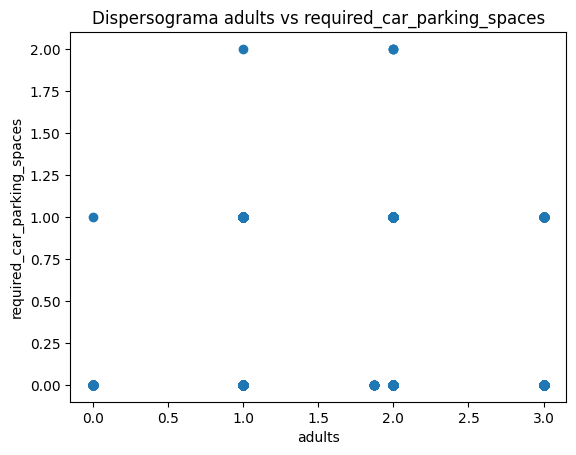

In [280]:
#Scatter Plot
plt.scatter(df_test.adults,df_test.required_car_parking_spaces)
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.xlabel('adults')
plt.ylabel('required_car_parking_spaces')
plt.show()



In [281]:
#Calulo el vector de medias
vmedias_ar =np.mean(df_test[['adults','required_car_parking_spaces']])

#Calculo la diferencia entre las observaciones y el vector de medias
x_dif_ar = df_test[['adults','required_car_parking_spaces']] - vmedias_ar

#Calculo matriz de covarianza y su inversa
cov_ar=df_test[['adults','required_car_parking_spaces']].cov().values
inv_cov = np.linalg.inv(cov_ar)

#Calculamos el cuadrado de la distancia de mahalanobis
mahal_ar =np.dot( np.dot(x_dif_ar, inv_cov) , x_dif_ar.T)



In [282]:
df_test['mahalanobis_ar']=mahal_ar.diagonal()


<Axes: ylabel='mahalanobis_ar'>

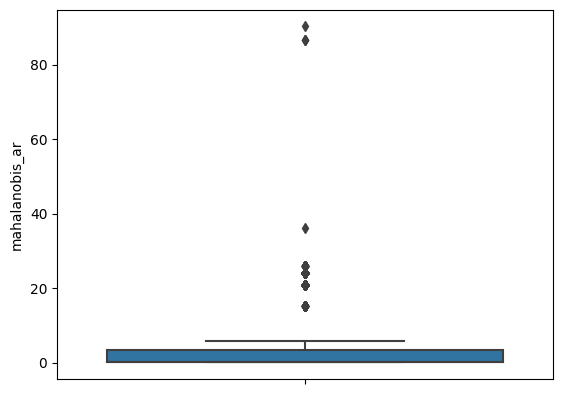

In [283]:
sns.boxplot(y=df_test.mahalanobis_ar)


In [284]:
np.sort(df_test.mahalanobis_ar)

array([4.80064845e-02, 4.80064845e-02, 4.80064845e-02, ...,
       8.66209883e+01, 8.66209883e+01, 9.02534583e+01])

In [285]:
#Defino umbral
umbral_ar=30

#Observacione anómalas
df_test[df_test['mahalanobis_ar']>umbral_ar]



,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date,id,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,mahalanobis_ar
2366,Resort Hotel,74,2017,July,26,1,9,21,1.0,0.0,...,115.0,2,3,2017-07-31,7824b2ca-373e-44d8-9fdc-6e6987e48aea,True,0.0,Medium,Very Short,90.253458
17254,Resort Hotel,246,2017,June,23,6,6,15,2.0,0.0,...,82.0,2,1,2017-06-27,af8600da-3129-40eb-a232-9efbe5b54b38,True,0.0,Long,Very Short,86.620988
19204,Resort Hotel,0,2017,May,22,28,1,0,2.0,0.0,...,99.0,2,0,2017-05-29,46d7547e-c1e6-4eea-96b5-21081e0fe2e5,True,0.0,Very Short,Very Short,86.620988
21826,Resort Hotel,155,2015,August,31,1,4,6,2.0,0.0,...,201.8,2,1,2015-08-11,77d9dbd8-6f7b-48e5-a9f4-8082888c286f,False,0.0,Long,Very Short,86.620988
25290,City Hotel,0,2017,March,12,21,0,0,0.0,0.0,...,0.0,1,1,2017-03-21,d8ef2c39-3bd5-448e-9a28-5d76228be4c2,True,0.0,Very Short,Very Short,36.183548


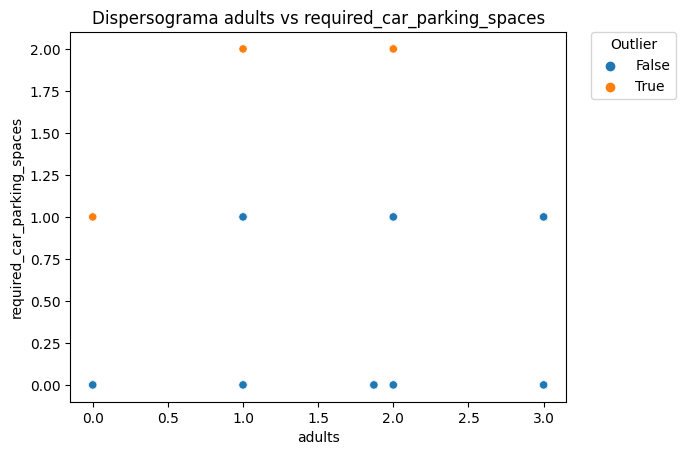

In [286]:

#Grafico scatter
es_outlier_ar = (df_test['mahalanobis_ar'] > umbral_ar)

sns.scatterplot(x=df_test.adults,y=df_test.required_car_parking_spaces, hue=es_outlier_ar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.show()


In [287]:
media_required_car_parking_spaces = df_test['required_car_parking_spaces'].mean()
df_test.loc[es_outlier_ar, 'required_car_parking_spaces'] = media_required_car_parking_spaces

In [288]:
columna_a_eliminar_test = 'reservation_status_date'
df_test.drop(columna_a_eliminar_test, axis='columns', inplace = True)
df_test.insert(1, 'is_canceled', " ")
df_test = pd.DataFrame(df_test)

df_trabajo_test = df_test[features]
df_trabajo_test_dum = pd.get_dummies(df_trabajo_test, columns = columns_to_dum)


In [289]:
### Train

In [290]:
df_train['room_type_match'] = df_train['assigned_room_type'] == df_train['reserved_room_type']
df_train['cancel_to_noncancel_ratio'] = df_train['previous_cancellations'] / (1 + df_train['previous_bookings_not_canceled'])
df_train['lead_time_category'] = pd.cut(df_train['lead_time'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)
df_train['days_in_waiting_list_category'] = pd.cut(df_train['days_in_waiting_list'], bins=[0, 10, 50, 100, 500, 10000], labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long'], right=False)

country_counts_train = df_train['country'].value_counts()
top_10_countries_train = country_counts_train.head(10).index.tolist()
df_train['country'] = df_train['country'].apply(lambda x: x if x in top_10_countries_train else 'otro')

market_segment_counts_train = df_train['market_segment'].value_counts()
top_3_ms_train = market_segment_counts_train.head(4).index.tolist()
df_train['market_segment'] = df_train['market_segment'].apply(lambda x: x if x in top_3_ms_train else 'otro')

ct_counts_train = df_train['customer_type'].value_counts()
top_ct_train = ct_counts_train.head(2).index.tolist()
df_train['customer_type'] = df_train['customer_type'].apply(lambda x: x if x in top_ct_train else 'otro')


dc_counts_train = df_train['distribution_channel'].value_counts()
top_dc_train = dc_counts_train.head(2).index.tolist()
df_train['distribution_channel'] = df_train['distribution_channel'].apply(lambda x: x if x in top_dc_train else 'otro')



In [291]:
round(df_train.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,61913.0,112.25,110.72,0.00,23.0,78.0,172.0,629.0
arrival_date_year,61913.0,2016.15,0.71,2015.00,2016.0,2016.0,2017.0,2017.0
arrival_date_week_number,61913.0,27.22,13.53,1.00,16.0,28.0,38.0,53.0
arrival_date_day_of_month,61913.0,15.79,8.80,1.00,8.0,16.0,23.0,31.0
stays_in_weekend_nights,61913.0,0.92,0.99,0.00,0.0,1.0,2.0,16.0
stays_in_week_nights,61913.0,2.51,1.88,0.00,1.0,2.0,3.0,40.0
adults,61913.0,1.86,0.59,0.00,2.0,2.0,2.0,55.0
children,61909.0,0.10,0.40,0.00,0.0,0.0,0.0,10.0
babies,61913.0,0.01,0.09,0.00,0.0,0.0,0.0,9.0
is_repeated_guest,61913.0,0.03,0.16,0.00,0.0,0.0,0.0,1.0


In [292]:
df_trabajo_train = df_train[features]
df_trabajo_train_dum = pd.get_dummies(df_trabajo_train, columns = columns_to_dum)

In [293]:
# Adults
media_adults = np.mean(df_train.adults)
std_adults = np.std(df_train.adults)
df_train['z_adults'] = (df_train.adults - media_adults) / std_adults

# Babies
media_babies = np.mean(df_train.babies)
std_babies = np.std(df_train.babies)
df_train['z_babies'] = (df_train.babies - media_babies) / std_babies

# Children
media_children = np.mean(df_train.children)
std_children = np.std(df_train.children)
df_train['z_children'] = (df_train.children - media_children) / std_children

# Adr
media_adr = np.mean(df_train.adr)
std_adr = np.std(df_train.adr)
df_train['z_adr'] = (df_train.adr - media_adr) / std_adr


In [294]:
df_train.loc[(df_train['z_adults'] > 3), 'adults'] = media_adults
df_train.loc[(df_train['z_adults'] < -3), 'adults'] = media_adults

df_train.loc[(df_train['z_babies'] > 3), 'babies'] = media_babies
df_train.loc[(df_train['z_babies'] < -3), 'babies'] = media_babies

df_train.loc[(df_train['z_children'] > 3), 'children'] = media_children
df_train.loc[(df_train['z_children'] < -3), 'children'] = media_children

df_train.loc[(df_train['z_adr'] > 5), 'adr'] = media_adr
df_train.loc[(df_train['z_adr'] < -5), 'adr'] = media_adr


In [295]:
df_train.drop(columns =['z_adults', 'z_babies', 'z_children','z_adr'], axis=1, inplace = True)

In [296]:
round(df_train.describe(), 2).transpose()

,count,mean,std,min,25%,50%,75%,max
lead_time,61913.0,112.25,110.72,0.00,23.0,78.0,172.0,629.00
arrival_date_year,61913.0,2016.15,0.71,2015.00,2016.0,2016.0,2017.0,2017.00
arrival_date_week_number,61913.0,27.22,13.53,1.00,16.0,28.0,38.0,53.00
arrival_date_day_of_month,61913.0,15.79,8.80,1.00,8.0,16.0,23.0,31.00
stays_in_weekend_nights,61913.0,0.92,0.99,0.00,0.0,1.0,2.0,16.00
stays_in_week_nights,61913.0,2.51,1.88,0.00,1.0,2.0,3.0,40.00
adults,61913.0,1.86,0.47,1.00,2.0,2.0,2.0,3.00
children,61909.0,0.04,0.20,0.00,0.0,0.0,0.0,1.00
babies,61913.0,0.00,0.00,0.00,0.0,0.0,0.0,0.01
is_repeated_guest,61913.0,0.03,0.16,0.00,0.0,0.0,0.0,1.00


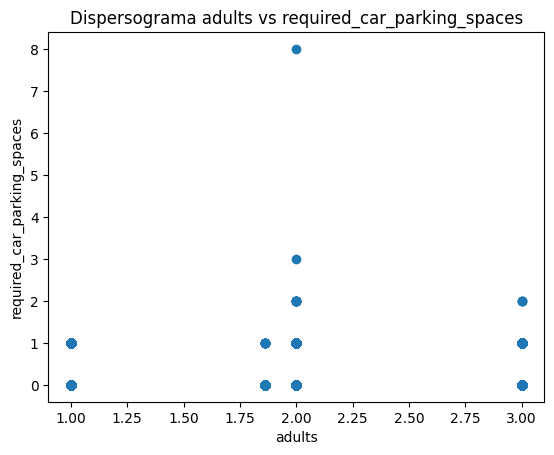

In [297]:
# Scatter Plot
plt.scatter(df_train.adults, df_train.required_car_parking_spaces)
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.xlabel('adults')
plt.ylabel('required_car_parking_spaces')
plt.show()

In [298]:

# Cálculo del vector de medias
vmedias_ar = np.mean(df_train[['adults', 'required_car_parking_spaces']])

# Cálculo de la diferencia entre las observaciones y el vector de medias
x_dif_ar = df_train[['adults', 'required_car_parking_spaces']] - vmedias_ar

# Cálculo de la matriz de covarianza y su inversa
cov_ar = df_train[['adults', 'required_car_parking_spaces']].cov().values
inv_cov = np.linalg.inv(cov_ar)

# Cálculo del cuadrado de la distancia de Mahalanobis
from scipy.spatial import distance
distancias_mahalanobis = []

# Iterar sobre las filas del DataFrame df_train
for index, fila in df_train.iterrows():
    vector_datos = fila[['adults', 'required_car_parking_spaces']].values
    distancia_mahalanobis = distance.mahalanobis(vector_datos, vmedias_ar, inv_cov)
    distancias_mahalanobis.append(distancia_mahalanobis)

<Axes: ylabel='mahalanobis_ar'>

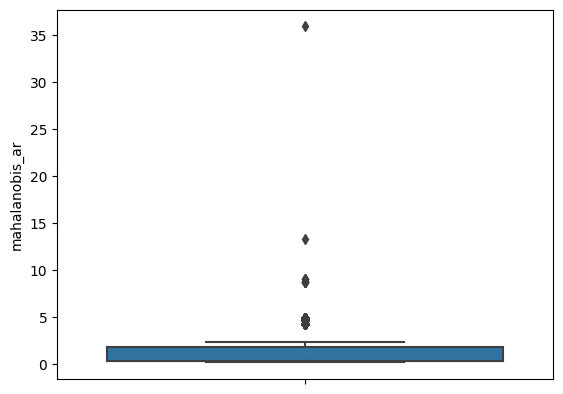

In [299]:

df_train['mahalanobis_ar'] = distancias_mahalanobis
sns.boxplot(y=df_train.mahalanobis_ar)


In [300]:
umbral_ar = 8
# Observaciones anómalas
df_train[df_train['mahalanobis_ar'] > umbral_ar]


,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,adr,required_car_parking_spaces,total_of_special_requests,id,is_canceled,room_type_match,cancel_to_noncancel_ratio,lead_time_category,days_in_waiting_list_category,mahalanobis_ar
621,City Hotel,1,2017,July,28,13,0,1,3.0,0.000000,...,283.00,2,1,5a0d9f70-f093-48bd-a9de-f7cd1ec9e9df,0,True,0.0,Very Short,Very Short,9.125135
2168,Resort Hotel,223,2016,May,22,24,1,5,2.0,0.000000,...,52.00,2,0,53d1b052-1c99-4fe9-bfc6-690b33ab29ba,0,True,0.0,Long,Very Short,8.824916
8269,Resort Hotel,138,2017,March,12,19,2,2,2.0,0.000000,...,80.00,8,0,174365a6-2548-48c4-ae12-7842d5498f12,0,False,0.0,Long,Long,35.969399
9683,Resort Hotel,32,2016,August,36,30,0,1,3.0,1.000000,...,274.00,2,1,5025f110-3717-4dec-8f39-8f432aef057a,0,True,0.0,Short,Very Short,9.125135
11056,Resort Hotel,0,2017,January,5,29,1,0,2.0,0.104896,...,85.00,2,0,1adeaaa0-261b-4cff-96f6-e2c773c07ea1,0,True,0.0,Very Short,Very Short,8.824916
11820,Resort Hotel,36,2016,March,11,10,2,5,2.0,0.000000,...,59.14,2,2,0d29b1cc-ce3e-45e1-81a2-0ce1b1012ae1,0,True,0.0,Short,Very Short,8.824916
13713,Resort Hotel,205,2017,June,26,26,3,10,2.0,0.000000,...,111.00,3,0,4267af65-0a89-4489-b099-e0332c6c51fe,0,True,0.0,Long,Very Short,13.347977
14389,Resort Hotel,44,2015,July,28,5,2,0,3.0,0.000000,...,225.00,2,0,6c61e85c-012f-482f-b4a2-2080453c8525,0,True,0.0,Short,Very Short,9.125135
22088,Resort Hotel,225,2016,May,22,26,2,3,2.0,0.000000,...,80.00,2,0,413a4fb7-2a0d-47c7-8af4-1723b5b02dfe,0,True,0.0,Long,Very Short,8.824916
38632,Resort Hotel,5,2017,February,9,28,1,5,2.0,0.000000,...,47.50,2,0,49eadee4-f7ec-4b3d-9a69-e8d174665741,0,True,0.0,Very Short,Very Short,8.824916


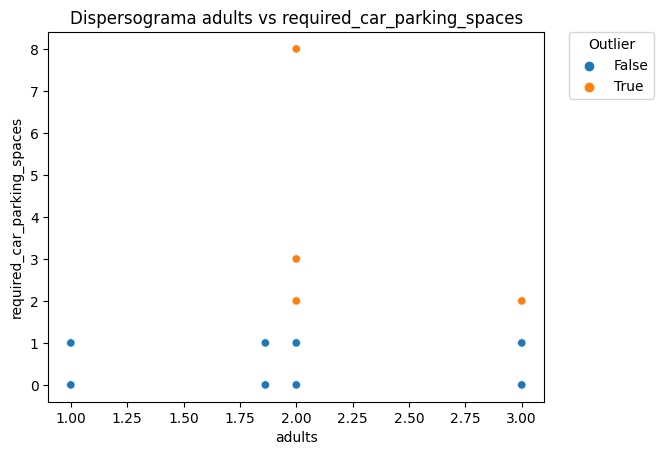

In [301]:
# Gráfico scatter
es_outlier_ar = (df_train['mahalanobis_ar'] > umbral_ar)

sns.scatterplot(x=df_train.adults, y=df_train.required_car_parking_spaces, hue=es_outlier_ar)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, title="Outlier")
plt.title('Dispersograma adults vs required_car_parking_spaces')
plt.show()

media_required_car_parking_spaces = df_train['required_car_parking_spaces'].mean()
df_train.loc[es_outlier_ar, 'required_car_parking_spaces'] = media_required_car_parking_spaces


### Probamos a ver si tira buena prediccion lrpm

In [302]:
X = df_trabajo_train_dum.drop(['is_canceled', 'id'], axis=1)
y = df_trabajo_train_dum['is_canceled'].copy()

In [303]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [304]:

param_dist = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1],
    'colsample_bytree': [0.8, 0.9, 1],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBClassifier()

n_iter_search = 10

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=n_iter_search, scoring='f1', cv=3, verbose=1)
random_search.fit(X_train, y_train)

best_xgb = random_search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [305]:
best_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

AUC: 0.9233231316292103
              precision    recall  f1-score   support

           0       0.83      0.83      0.83      9391
           1       0.83      0.83      0.83      9183

    accuracy                           0.83     18574
   macro avg       0.83      0.83      0.83     18574
weighted avg       0.83      0.83      0.83     18574



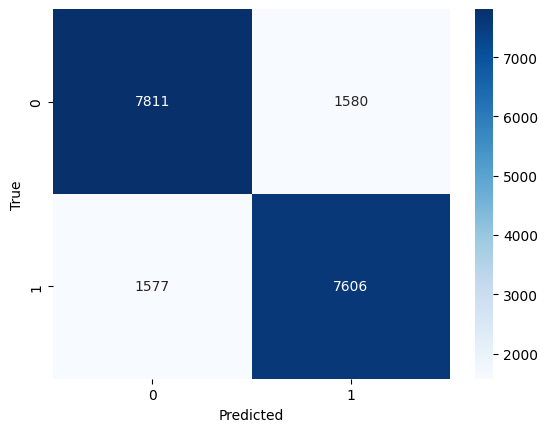

In [306]:

y_pred_proba= best_xgb.predict_proba(X_test)[:, 1]
print('AUC:',roc_auc_score(y_test, y_pred_proba))

y_predxgboost=best_xgb.predict(X_test)

cm = confusion_matrix(y_test,y_predxgboost)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

print(classification_report(y_test,y_predxgboost))


In [307]:
def mostrar_metricas(y_test, y_pred):
    accuracy=accuracy_score(y_test,y_pred)
    recall=recall_score(y_test,y_pred)
    f1=f1_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    print("Accuracy: "+str(accuracy))
    print("Recall: "+str(recall))
    print("Precision: "+str(precision))
    print("f1 score: "+str(f1))

In [308]:
mostrar_metricas(y_test,y_predxgboost)

Accuracy: 0.830031226445569
Recall: 0.8282696286616574
Precision: 0.8279991291095145
f1 score: 0.8281343567967772


In [309]:
columnas_faltantes_en_train = set(df_trabajo_test_dum.columns) - set(df_trabajo_train_dum.columns)
columnas_faltantes_en_test = set(df_trabajo_train_dum.columns)- set(df_trabajo_test_dum.columns)
print('Columnas faltantes es train:', columnas_faltantes_en_train)
print('Columnas faltantes es test:', columnas_faltantes_en_test)


Columnas faltantes es train: set()
Columnas faltantes es test: set()


In [310]:
from google.colab import files
df_xgb = df_trabajo_test_dum.drop(['is_canceled', 'id'], axis='columns', inplace=False)
ids3 = df_trabajo_test_dum['id'].copy()

pred_xgb = best_xgb.predict(df_xgb)

df_pred_xgb = pd.DataFrame({'id': ids3, 'is_canceled': pred_xgb})

df_pred_xgb.to_csv('df_pred_xgb.csv')
files.download('df_pred_xgb.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [312]:
df_trabajo_test_dum.to_csv('df_test_limpio.csv')
files.download('df_test_limpio.csv')

df_trabajo_train_dum.to_csv('df_train_limpio.csv')
files.download('df_train_limpio.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>